In [33]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pyvis.network import Network


Processing dataset...
Graph Information:
Number of nodes: 1965206
Number of edges: 2766607
Is the graph connected? False
Visualizing a small part of the graph...


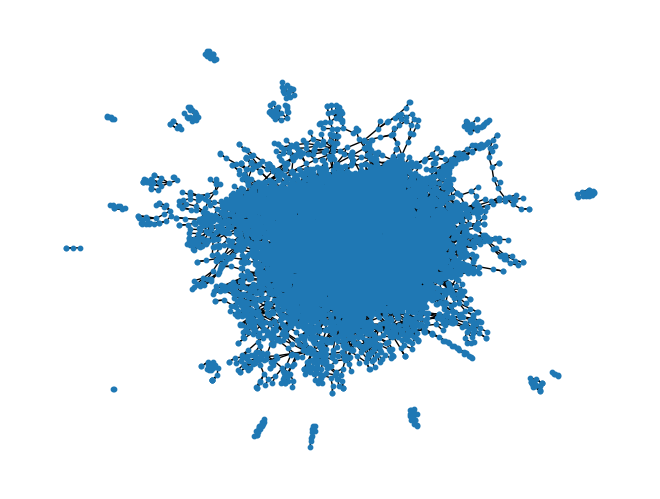

In [6]:
import gzip
import networkx as nx
import urllib.request

# URL for the dataset
url = "http://snap.stanford.edu/data/roadNet-CA.txt.gz"
file_name = "roadNet-CA.txt.gz"

# Download the dataset
print("Downloading dataset...")
urllib.request.urlretrieve(url, file_name)

# Open the gzipped file
print("Processing dataset...")
with gzip.open(file_name, 'rt') as f:
    # Read the edge list and create a graph
    G = nx.read_edgelist(f, comments='#', create_using=nx.Graph(), nodetype=int)

# Print basic info about the graph using alternative methods
print("Graph Information:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the graph connected? {nx.is_connected(G)}")

# Visualize the graph (optional, for smaller subsets)
print("Visualizing a small part of the graph...")
small_G = G.subgraph(list(G.nodes)[:10000])  # Take a small subgraph for visualization
nx.draw(small_G, node_size=10)


In [35]:
# Compute degree for each node
degree = dict(G.degree())

# Normalize the degrees using StandardScaler
scaler = StandardScaler()
degree_scaled = scaler.fit_transform(np.array(list(degree.values())).reshape(-1, 1))

# Apply PCA for dimensionality reduction (if you have high-dimensional features)
pca = PCA(n_components=1)
degree_pca = pca.fit_transform(degree_scaled)
print("PCA Results:", degree_pca)


PCA Results: [[ 0.18540693]
 [ 0.18540693]
 [-0.8199981 ]
 ...
 [-1.82540313]
 [-1.82540313]
 [-1.82540313]]


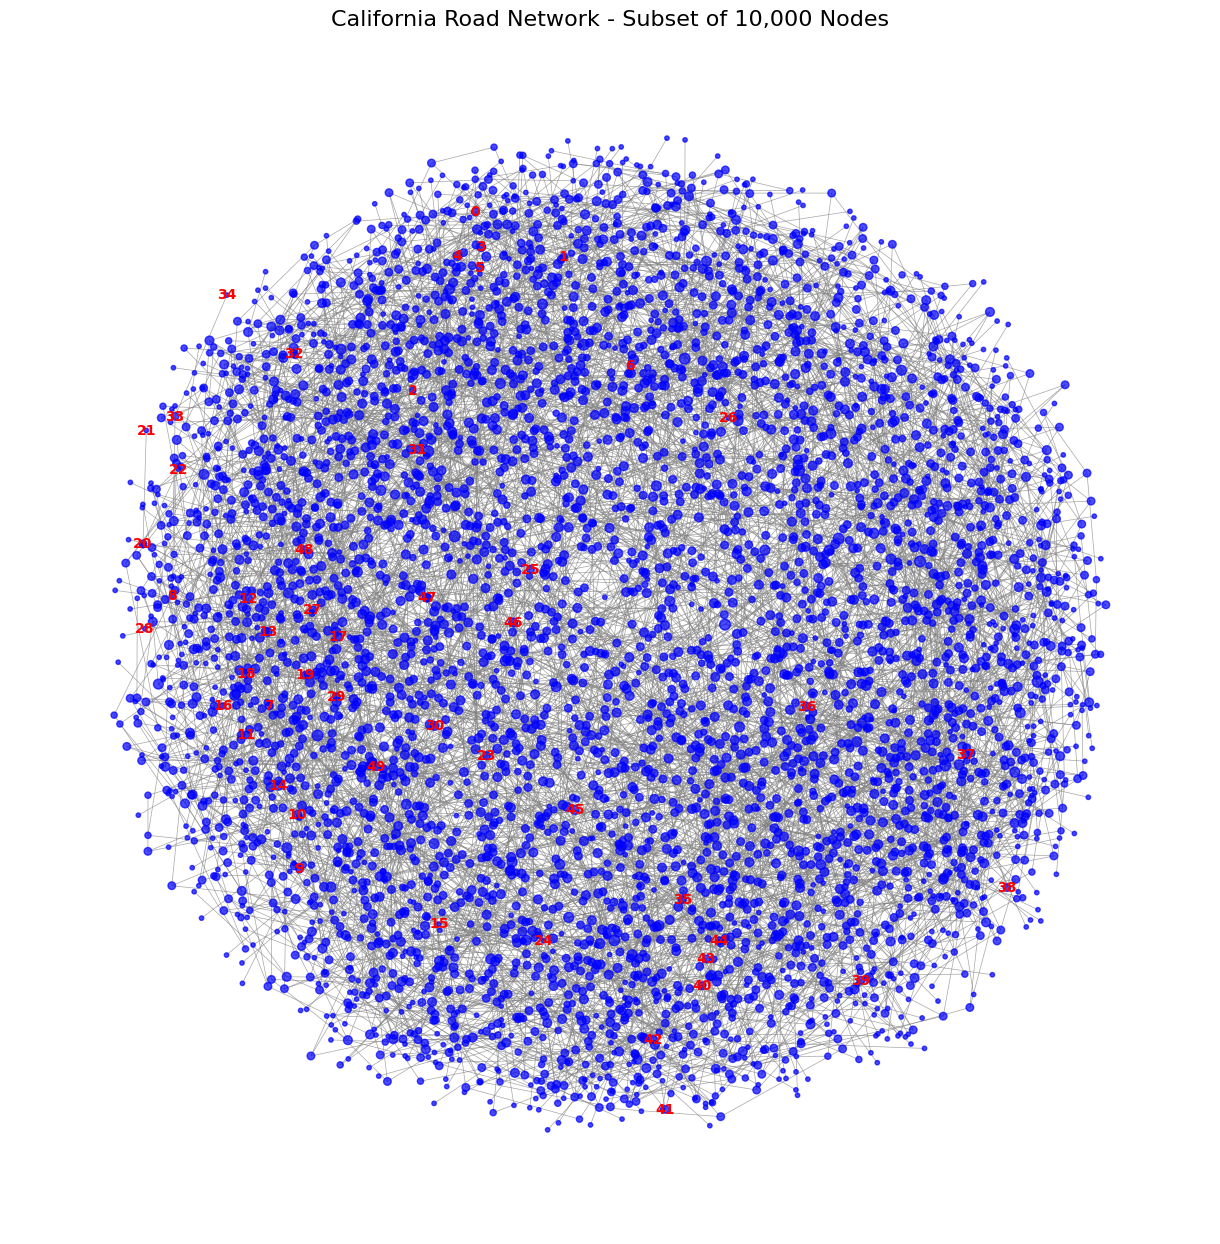

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Subset the graph to 10,000 nodes (if you haven't already)
subset_nodes = list(G.nodes())[:5000]
subset_G = G.subgraph(subset_nodes)

# Set up the figure for visualization
plt.figure(figsize=(12, 12))  # Increase the figure size for clarity

# Choose a layout for better readability
pos = nx.spring_layout(subset_G, seed=42, k=0.1)  # 'spring_layout' gives a good visually separated graph

# Create edge weights (for visualization - here we just use 1 for all edges)
edge_weights = np.ones(len(subset_G.edges()))  # Uniform edge weight for visualization

# Adjust node size based on degree to make central nodes more prominent
node_sizes = [subset_G.degree(node) * 10 for node in subset_G]  # Scale node size based on degree

# Draw the graph with customized node and edge settings
nx.draw(
    subset_G, 
    pos,
    node_size=node_sizes,        # Node size based on degree
    node_color='blue',           # Nodes are colored blue
    edge_color='gray',           # Edges are colored gray (contrast better)
    width=0.5,                   # Slightly thicker edges for better visibility
    with_labels=False,           # No labels to reduce clutter
    font_size=8,                 # Smaller font size for labels (if any)
    font_weight='bold',          # Bold font for labels
    alpha=0.7                    # Set transparency for the whole graph (nodes and edges)
)

# Optionally, add labels to a small subset of nodes (e.g., random or first few)
labels = {node: node for node in list(subset_G.nodes())[:50]}  # Label the first 50 nodes
nx.draw_networkx_labels(subset_G, pos, labels=labels, font_size=10, font_weight='bold', font_color='red')

# Add a title
plt.title("California Road Network - Subset of 10,000 Nodes", fontsize=16)

# Show the plot
plt.axis('off')  # Hide the axis
plt.show()


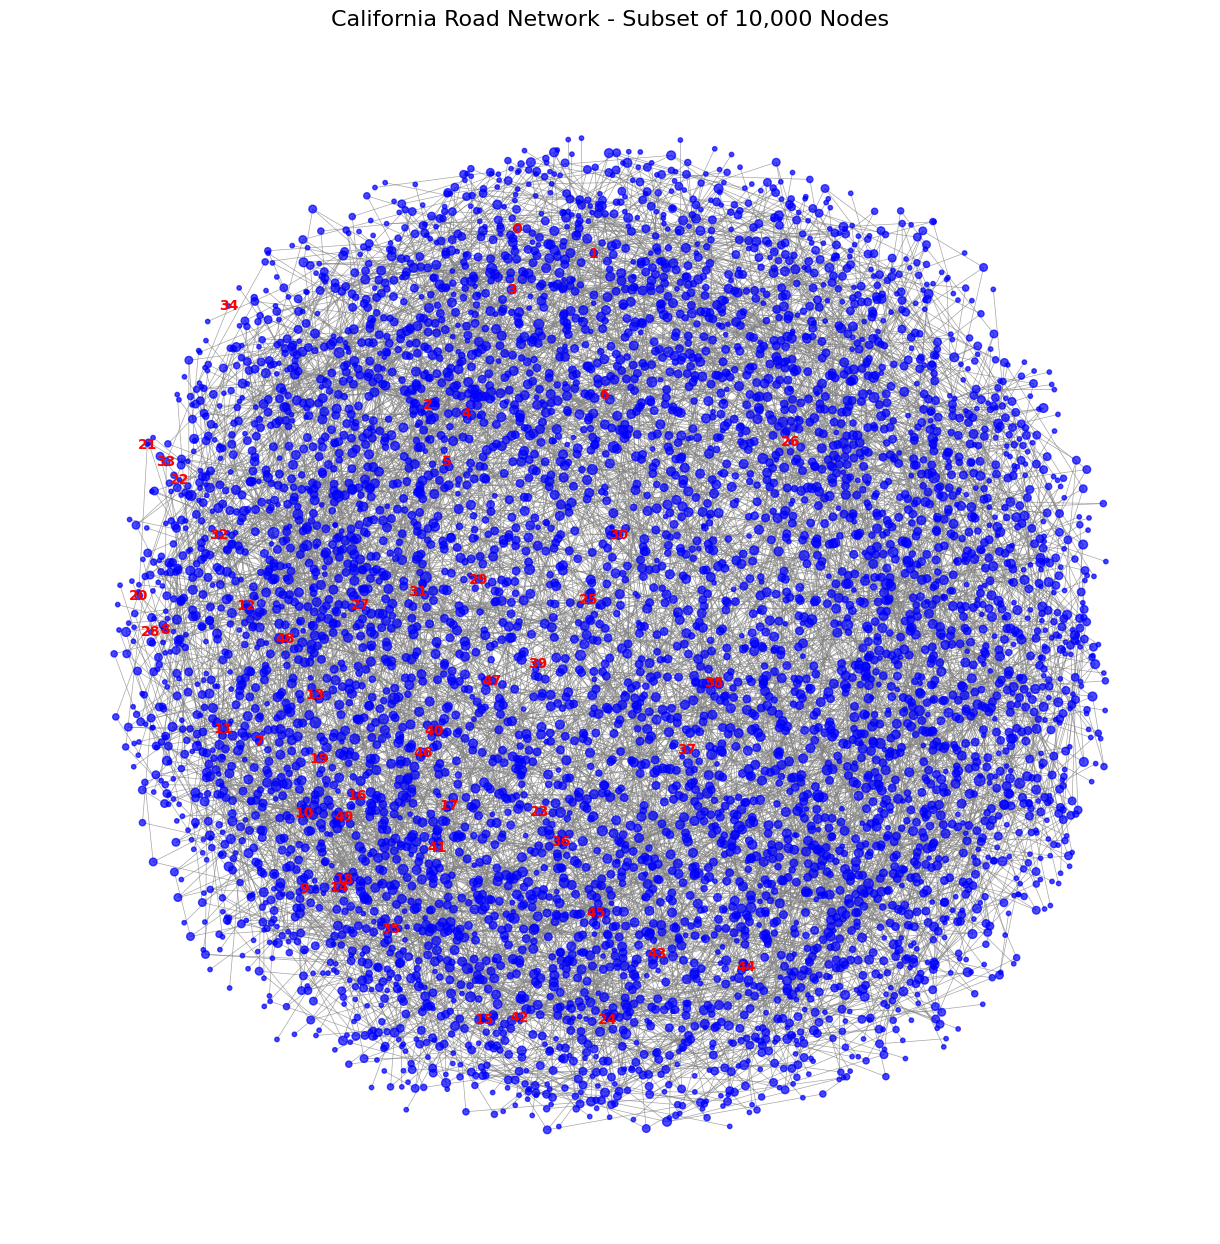

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Subset the graph to 10,000 nodes (if you haven't already)
subset_nodes = list(G.nodes())[:6000]
subset_G = G.subgraph(subset_nodes)

# Set up the figure for visualization
plt.figure(figsize=(12, 12))  # Increase the figure size for clarity

# Choose a layout for better readability
pos = nx.spring_layout(subset_G, seed=42, k=0.1)  # 'spring_layout' gives a good visually separated graph

# Create edge weights (for visualization - here we just use 1 for all edges)
edge_weights = np.ones(len(subset_G.edges()))  # Uniform edge weight for visualization

# Adjust node size based on degree to make central nodes more prominent
node_sizes = [subset_G.degree(node) * 10 for node in subset_G]  # Scale node size based on degree

# Draw the graph with customized node and edge settings
nx.draw(
    subset_G, 
    pos,
    node_size=node_sizes,        # Node size based on degree
    node_color='blue',           # Nodes are colored blue
    edge_color='gray',           # Edges are colored gray (contrast better)
    width=0.5,                   # Slightly thicker edges for better visibility
    with_labels=False,           # No labels to reduce clutter
    font_size=8,                 # Smaller font size for labels (if any)
    font_weight='bold',          # Bold font for labels
    alpha=0.7                    # Set transparency for the whole graph (nodes and edges)
)

# Optionally, add labels to a small subset of nodes (e.g., random or first few)
labels = {node: node for node in list(subset_G.nodes())[:50]}  # Label the first 50 nodes
nx.draw_networkx_labels(subset_G, pos, labels=labels, font_size=10, font_weight='bold', font_color='red')

# Add a title
plt.title("California Road Network - Subset of 10,000 Nodes", fontsize=16)

# Show the plot
plt.axis('off')  # Hide the axis
plt.show()


1. Degree, Average Degree, and Degree Distribution
Degree: The degree of a node is the number of edges connected to that node.
Average Degree: The average number of edges per node.
Degree Distribution: The distribution of degrees across all nodes

In [17]:
import numpy as np

# Degree of each node
degree = dict(subset_G.degree())

# Average Degree
avg_degree = np.mean(list(degree.values()))

# Degree Distribution
degree_distribution = [degree[node] for node in subset_G.nodes()]
unique_degrees, degree_counts = np.unique(degree_distribution, return_counts=True)

print(f"Average Degree: {avg_degree}")
print(f"Degree Distribution (Unique Degrees and Counts): {list(zip(unique_degrees, degree_counts))}")

Average Degree: 2.6826666666666665
Degree Distribution (Unique Degrees and Counts): [(0, 1), (1, 1111), (2, 959), (3, 2731), (4, 1130), (5, 54), (6, 14)]


2. Adjacency Matrix
The adjacency matrix represents the connections between nodes in the graph. A 1 indicates an edge, while a 0 indicates no edge between nodes.

In [18]:
# Adjacency Matrix
adj_matrix = nx.adjacency_matrix(subset_G).todense()
print("Adjacency Matrix:")
print(adj_matrix)


Adjacency Matrix:
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


3. Number of Links
The number of links (edges) in the graph.

In [19]:
# Number of links (edges)
num_edges = subset_G.number_of_edges()
print(f"Number of Links (Edges): {num_edges}")


Number of Links (Edges): 8048


4. Network Diameter
The network diameter is the greatest distance between any two nodes in the graph.

In [ ]:
# Network Diameter
diameter = nx.diameter(subset_G)
print(f"Network Diameter: {diameter}")


5. Average Path Length
The average length of the shortest paths between all pairs of nodes in the network.

In [ ]:
# Average Path Length
avg_path_length = nx.average_shortest_path_length(subset_G)
print(f"Average Path Length: {avg_path_length}")


6. Connectedness
A network is connected if there is a path between any two nodes.

In [21]:
# Connectedness
is_connected = nx.is_connected(subset_G)
print(f"Is the network connected? {is_connected}")


Is the network connected? False


7. Clustering Coefficient
The clustering coefficient measures how close the nodes are to forming complete triangles.

In [23]:
# Clustering Coefficient for each node
clustering_coeff = nx.clustering(subset_G)
avg_clustering_coeff = np.mean(list(clustering_coeff.values()))
print(f"Average Clustering Coefficient: {avg_clustering_coeff}")

Average Clustering Coefficient: 0.059844444444444436


8. Degree Correlation and Assortativity Coefficient
Degree Correlation: It measures the correlation between the degrees of connected nodes.
Assortativity Coefficient: This is a measure of the tendency of nodes in a network to connect to other nodes with similar degree.

In [24]:
# Degree Assortativity Coefficient
assortativity = nx.degree_assortativity_coefficient(subset_G)
print(f"Assortativity Coefficient: {assortativity}")

Assortativity Coefficient: 0.020950691189230198


9. Degree Correlation Matrix
The degree correlation matrix provides a correlation of node degrees for pairs of nodes.

In [25]:
# Degree Correlation Matrix
degree_correlation_matrix = nx.degree_assortativity_coefficient(subset_G, x='in', y='out')
print(f"Degree Correlation Matrix: {degree_correlation_matrix}")


Degree Correlation Matrix: 0.020950691189230198


10. Degree Correlation Function
This function calculates the degree correlation function, showing the relationship between node degrees.

In [26]:
# Degree Correlation Function (Can use the assortativity function)
# Degree correlation function will be similar to assortativity in an undirected graph
degree_correlation_function = nx.degree_assortativity_coefficient(subset_G)
print(f"Degree Correlation Function: {degree_correlation_function}")


Degree Correlation Function: 0.020950691189230198


11. Assortative Mixing Patterns
Assortative Mixing: A network is assortatively mixed if nodes tend to link to other nodes with similar degree.

In [27]:
# Assortative Mixing Coefficient
assortative_mixing = nx.assortativity.average_degree_connectivity(subset_G)
print(f"Assortative Mixing Coefficient: {assortative_mixing}")

Assortative Mixing Coefficient: {3: 2.9821799096789943, 2: 3.005213764337852, 4: 3.1907079646017698, 1: 3.315031503150315, 5: 3.3333333333333335, 6: 3.0714285714285716, 0: 0}


In [ ]:
12. Disassortative Mixing Patterns
Disassortative Mixing: A network is disassortatively mixed if nodes tend to link to nodes with different degree values.

In [28]:
# Disassortative Mixing can be observed if assortativity is negative
if assortativity < 0:
    print("The network exhibits disassortative mixing.")
else:
    print("The network does not exhibit disassortative mixing.")


The network does not exhibit disassortative mixing.


13. Neutral Mixing Patterns
Neutral mixing indicates no correlation between node degrees.

In [29]:
# Neutral Mixing can be inferred when assortativity coefficient is close to zero
if abs(assortativity) < 0.05:
    print("The network exhibits neutral mixing patterns.")
else:
    print("The network does not exhibit neutral mixing patterns.")

The network exhibits neutral mixing patterns.


14. Degree Correlation and Structural Constraints
Degree correlation and structural constraints describe how network structure imposes limitations on degree correlation, often linked to network growth models.

15. Measuring Assortativity with Pearson’s Coefficient
The Pearson correlation coefficient can be used to measure assortativity in degree correlations.

In [30]:
# Pearson Correlation for assortativity (using the degree assortativity formula)
from scipy.stats import pearsonr

# Get degrees for all nodes
degrees = [deg for node, deg in subset_G.degree()]
correlation, _ = pearsonr(degrees, degrees)
print(f"Pearson Correlation Coefficient (Assortativity): {correlation}")


Pearson Correlation Coefficient (Assortativity): 1.0


16. In-Degree and Out-Degree
In-Degree: The number of incoming edges to a node (relevant for directed graphs).
Out-Degree: The number of outgoing edges from a node (relevant for directed graphs).

In [32]:
# If your graph is directed, you can use the following:
# Create a directed graph (for illustration)
subset_G_directed = subset_G.to_directed()

# In-degree and out-degree for directed graphs
in_degrees = dict(subset_G_directed.in_degree())
out_degrees = dict(subset_G_directed.out_degree())

print(f"In-Degree of node 0: {in_degrees[0]}")
print(f"Out-Degree of node 0: {out_degrees[0]}")


In-Degree of node 0: 3
Out-Degree of node 0: 3


Design the Network and Apply Models
We will apply the Barabási-Albert model (scale-free) and Erdős-Rényi model (random network).

In [36]:
# Barabási-Albert model: Scale-free network model
n = 6000  # Number of nodes
m = 5     # Number of edges to attach from a new node to existing nodes
G_barabasi = nx.barabasi_albert_graph(n, m)

# Erdős-Rényi model: Random graph model
p = 0.01  # Probability of creating an edge
G_erdos = nx.erdos_renyi_graph(n, p)

# Visualize the networks
plt.figure(figsize=(12, 8))

plt.subplot(121)
nx.draw(G_barabasi, with_labels=False, node_size=20, edge_color='blue')
plt.title("Barabási-Albert Model")

plt.subplot(122)
nx.draw(G_erdos, with_labels=False, node_size=20, edge_color='green')
plt.title("Erdős-Rényi Model")

plt.show()


Text(0.5, 1.0, 'Barabási-Albert Model')

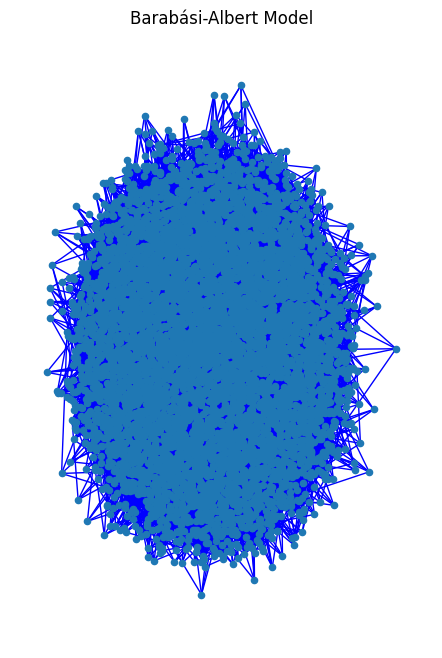

In [37]:
# Visualize the networks
plt.figure(figsize=(12, 8))

plt.subplot(121)
nx.draw(G_barabasi, with_labels=False, node_size=20, edge_color='blue')
plt.title("Barabási-Albert Model")


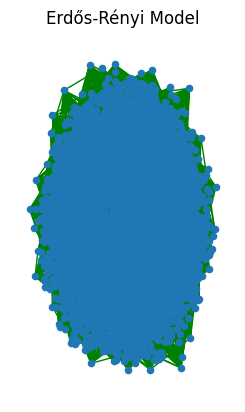

In [38]:
plt.subplot(122)
nx.draw(G_erdos, with_labels=False, node_size=20, edge_color='green')
plt.title("Erdős-Rényi Model")

plt.show()

Calculate Network Metrics

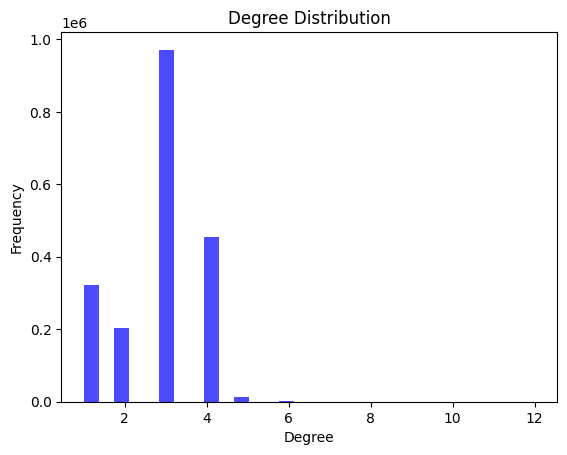

Average Clustering Coefficient: 0.04637027007478246


KeyboardInterrupt: 

In [39]:
# Degree Distribution
degree_distribution = [d for n, d in G.degree()]
plt.hist(degree_distribution, bins=30, color='blue', alpha=0.7)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# Clustering Coefficient
clustering = nx.clustering(G)
avg_clustering = np.mean(list(clustering.values()))
print(f"Average Clustering Coefficient: {avg_clustering}")

# Betweenness Centrality
betweenness = nx.betweenness_centrality(G)
avg_betweenness = np.mean(list(betweenness.values()))
print(f"Average Betweenness Centrality: {avg_betweenness}")



In [40]:
# Closeness Centrality
closeness = nx.closeness_centrality(G)
avg_closeness = np.mean(list(closeness.values()))
print(f"Average Closeness Centrality: {avg_closeness}")

KeyboardInterrupt: 

Apply Clustering (Modularization and Community Detection)

In [ ]:
# Girvan-Newman algorithm for community detection
from networkx.algorithms.community import girvan_newman

communities = girvan_newman(G)
top_level_communities = next(communities)  # Get top-level community structure
print(f"Top-level Communities: {list(top_level_communities)}")

# Visualize the communities (optional)
for community in top_level_communities:
    subgraph = G.subgraph(community)
    nx.draw(subgraph, with_labels=True, node_size=50, edge_color='red')
    plt.show()


Data Visualization

In [ ]:
# Visualizing with PyVis for interactive exploration
from pyvis.network import Network
net = Network(height="800px", width="100%", notebook=True)
net.from_nx(G)
net.show("california_road_network.html")
